# Objective

The Lasagna Triers Logistic Regression.xlsx file contains data on 856 people who have either tried or not tried a company’s new frozen lasagna product. The categorical dependent variable, Have Tried, and several of the potential explanatory variables contain text, as shown .



* For each data set ….please do EDA ….violin chart, group by, crosstab correlations is a must.



* Do prediction with 1. Linear Regression 2 Logistics regression  3. Classification trees



## 1. Loading libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## 2. Loading the data to the variable name lasagna_df

In [2]:
# loading data via pds
lasagna_df = pd.read_excel(r"C:\Users\Superman\Desktop\Education\MBA\Semester-V\BUSI 650\Capstone project\1Lasagna Triers.xlsx")
lasagna_df.head()

,Person,Age,Weight,Income,Pay Type,Car Value,CC Debt,Gender,Live Alone,Dwell Type,Mall Trips,Nbhd,Have Tried
0,1,48,175,65500,Hourly,2190,3510,Male,No,Home,7,East,No
1,2,33,202,29100,Hourly,2110,740,Female,No,Condo,4,East,Yes
2,3,51,188,32200,Salaried,5140,910,Male,No,Condo,1,East,No
3,4,56,244,19000,Hourly,700,1620,Female,No,Home,3,West,No
4,5,28,218,81400,Salaried,26620,600,Male,No,Apt,3,West,Yes


## 3. Data Cleaning 

In [3]:
# Moved person to index to avoid duplicate column

new_lasagna_df = lasagna_df.set_index('Person')
new_lasagna_df

,Age,Weight,Income,Pay Type,Car Value,CC Debt,Gender,Live Alone,Dwell Type,Mall Trips,Nbhd,Have Tried
Person,,,,,,,,,,,,
1,48,175,65500,Hourly,2190,3510,Male,No,Home,7,East,No
2,33,202,29100,Hourly,2110,740,Female,No,Condo,4,East,Yes
3,51,188,32200,Salaried,5140,910,Male,No,Condo,1,East,No
4,56,244,19000,Hourly,700,1620,Female,No,Home,3,West,No
5,28,218,81400,Salaried,26620,600,Male,No,Apt,3,West,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
852,50,245,101300,Salaried,3270,970,Female,No,Apt,2,South,No
853,36,227,25300,Salaried,3690,5170,Female,No,Condo,8,West,Yes
854,32,192,50400,Salaried,6930,1150,Male,No,Condo,5,East,Yes


In [4]:
# Checking null/na - if data missing in the columns

new_lasagna_df.isna().sum()

Age           0
Weight        0
Income        0
Pay Type      0
Car Value     0
CC Debt       0
Gender        0
Live Alone    0
Dwell Type    0
Mall Trips    0
Nbhd          0
Have Tried    0
dtype: int64

In [5]:
# checking if data enteries Dtype changed due to any non interger value

new_lasagna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 1 to 856
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         856 non-null    int64 
 1   Weight      856 non-null    int64 
 2   Income      856 non-null    int64 
 3   Pay Type    856 non-null    object
 4   Car Value   856 non-null    int64 
 5   CC Debt     856 non-null    int64 
 6   Gender      856 non-null    object
 7   Live Alone  856 non-null    object
 8   Dwell Type  856 non-null    object
 9   Mall Trips  856 non-null    int64 
 10  Nbhd        856 non-null    object
 11  Have Tried  856 non-null    object
dtypes: int64(6), object(6)
memory usage: 86.9+ KB


In [6]:
# rename all columns to remove space

new_lasagna_df.columns =[s.strip().replace(' ', '_') for s in new_lasagna_df.columns]
new_lasagna_df.head()

,Age,Weight,Income,Pay_Type,Car_Value,CC_Debt,Gender,Live_Alone,Dwell_Type,Mall_Trips,Nbhd,Have_Tried
Person,,,,,,,,,,,,
1,48,175,65500,Hourly,2190,3510,Male,No,Home,7,East,No
2,33,202,29100,Hourly,2110,740,Female,No,Condo,4,East,Yes
3,51,188,32200,Salaried,5140,910,Male,No,Condo,1,East,No
4,56,244,19000,Hourly,700,1620,Female,No,Home,3,West,No
5,28,218,81400,Salaried,26620,600,Male,No,Apt,3,West,Yes


In [7]:
# Converting columns with two text values into 1 and 0 

new_lasagna_df.replace(('Female', 'Male'), (0, 1), inplace=True)
new_lasagna_df.replace(('Hourly', 'Salaried'), (0, 1), inplace=True)
new_lasagna_df.replace(('No', 'Yes'), (0, 1), inplace=True)
new_lasagna_df.head()

,Age,Weight,Income,Pay_Type,Car_Value,CC_Debt,Gender,Live_Alone,Dwell_Type,Mall_Trips,Nbhd,Have_Tried
Person,,,,,,,,,,,,
1,48,175,65500,0,2190,3510,1,0,Home,7,East,0
2,33,202,29100,0,2110,740,0,0,Condo,4,East,1
3,51,188,32200,1,5140,910,1,0,Condo,1,East,0
4,56,244,19000,0,700,1620,0,0,Home,3,West,0
5,28,218,81400,1,26620,600,1,0,Apt,3,West,1


In [8]:
# cross check
new_lasagna_df.head()

,Age,Weight,Income,Pay_Type,Car_Value,CC_Debt,Gender,Live_Alone,Dwell_Type,Mall_Trips,Nbhd,Have_Tried
Person,,,,,,,,,,,,
1,48,175,65500,0,2190,3510,1,0,Home,7,East,0
2,33,202,29100,0,2110,740,0,0,Condo,4,East,1
3,51,188,32200,1,5140,910,1,0,Condo,1,East,0
4,56,244,19000,0,700,1620,0,0,Home,3,West,0
5,28,218,81400,1,26620,600,1,0,Apt,3,West,1


In [9]:
# Dummy variable functions to separate - Dwell type, NBHD into sperate columns as they have three values

# drop_first = True to drop the first dummy variable

new_lasagna_df = pd.get_dummies(new_lasagna_df, prefix_sep = '_', drop_first = False)
new_lasagna_df.head()

,Age,Weight,Income,Pay_Type,Car_Value,CC_Debt,Gender,Live_Alone,Mall_Trips,Have_Tried,Dwell_Type_Apt,Dwell_Type_Condo,Dwell_Type_Home,Nbhd_East,Nbhd_South,Nbhd_West
Person,,,,,,,,,,,,,,,,
1,48,175,65500,0,2190,3510,1,0,7,0,0,0,1,1,0,0
2,33,202,29100,0,2110,740,0,0,4,1,0,1,0,1,0,0
3,51,188,32200,1,5140,910,1,0,1,0,0,1,0,1,0,0
4,56,244,19000,0,700,1620,0,0,3,0,0,0,1,0,0,1
5,28,218,81400,1,26620,600,1,0,3,1,1,0,0,0,0,1


In [10]:
lasagna_df.head()

,Person,Age,Weight,Income,Pay Type,Car Value,CC Debt,Gender,Live Alone,Dwell Type,Mall Trips,Nbhd,Have Tried
0,1,48,175,65500,Hourly,2190,3510,Male,No,Home,7,East,No
1,2,33,202,29100,Hourly,2110,740,Female,No,Condo,4,East,Yes
2,3,51,188,32200,Salaried,5140,910,Male,No,Condo,1,East,No
3,4,56,244,19000,Hourly,700,1620,Female,No,Home,3,West,No
4,5,28,218,81400,Salaried,26620,600,Male,No,Apt,3,West,Yes


In [11]:
# Salaried-1, male-1, Live_alone- No-0, Have_tried_yes -1

# cross check
new_lasagna_df.head()

,Age,Weight,Income,Pay_Type,Car_Value,CC_Debt,Gender,Live_Alone,Mall_Trips,Have_Tried,Dwell_Type_Apt,Dwell_Type_Condo,Dwell_Type_Home,Nbhd_East,Nbhd_South,Nbhd_West
Person,,,,,,,,,,,,,,,,
1,48,175,65500,0,2190,3510,1,0,7,0,0,0,1,1,0,0
2,33,202,29100,0,2110,740,0,0,4,1,0,1,0,1,0,0
3,51,188,32200,1,5140,910,1,0,1,0,0,1,0,1,0,0
4,56,244,19000,0,700,1620,0,0,3,0,0,0,1,0,0,1
5,28,218,81400,1,26620,600,1,0,3,1,1,0,0,0,0,1


In [12]:
new_lasagna_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,856.0,38.782710,9.610763,22.0,31.0,37.5,46.0,64.0
Weight,856.0,192.661215,24.746380,142.0,174.0,190.0,210.0,258.0
Income,856.0,45266.939252,28631.290583,2600.0,24475.0,39950.0,58225.0,190500.0
Pay_Type,856.0,0.561916,0.496442,0.0,0.0,1.0,1.0,1.0
Car_Value,856.0,5908.481308,5533.459122,130.0,2110.0,4175.0,7717.5,33870.0
CC_Debt,856.0,1431.203271,1278.041567,0.0,560.0,1020.0,1972.5,8960.0
Gender,856.0,0.535047,0.499062,0.0,0.0,1.0,1.0,1.0
Live_Alone,856.0,0.169393,0.375318,0.0,0.0,0.0,0.0,1.0
Mall_Trips,856.0,4.734813,2.640840,0.0,3.0,4.0,7.0,17.0
Have_Tried,856.0,0.578271,0.494124,0.0,0.0,1.0,1.0,1.0


## 4. Exploratory data analysis 

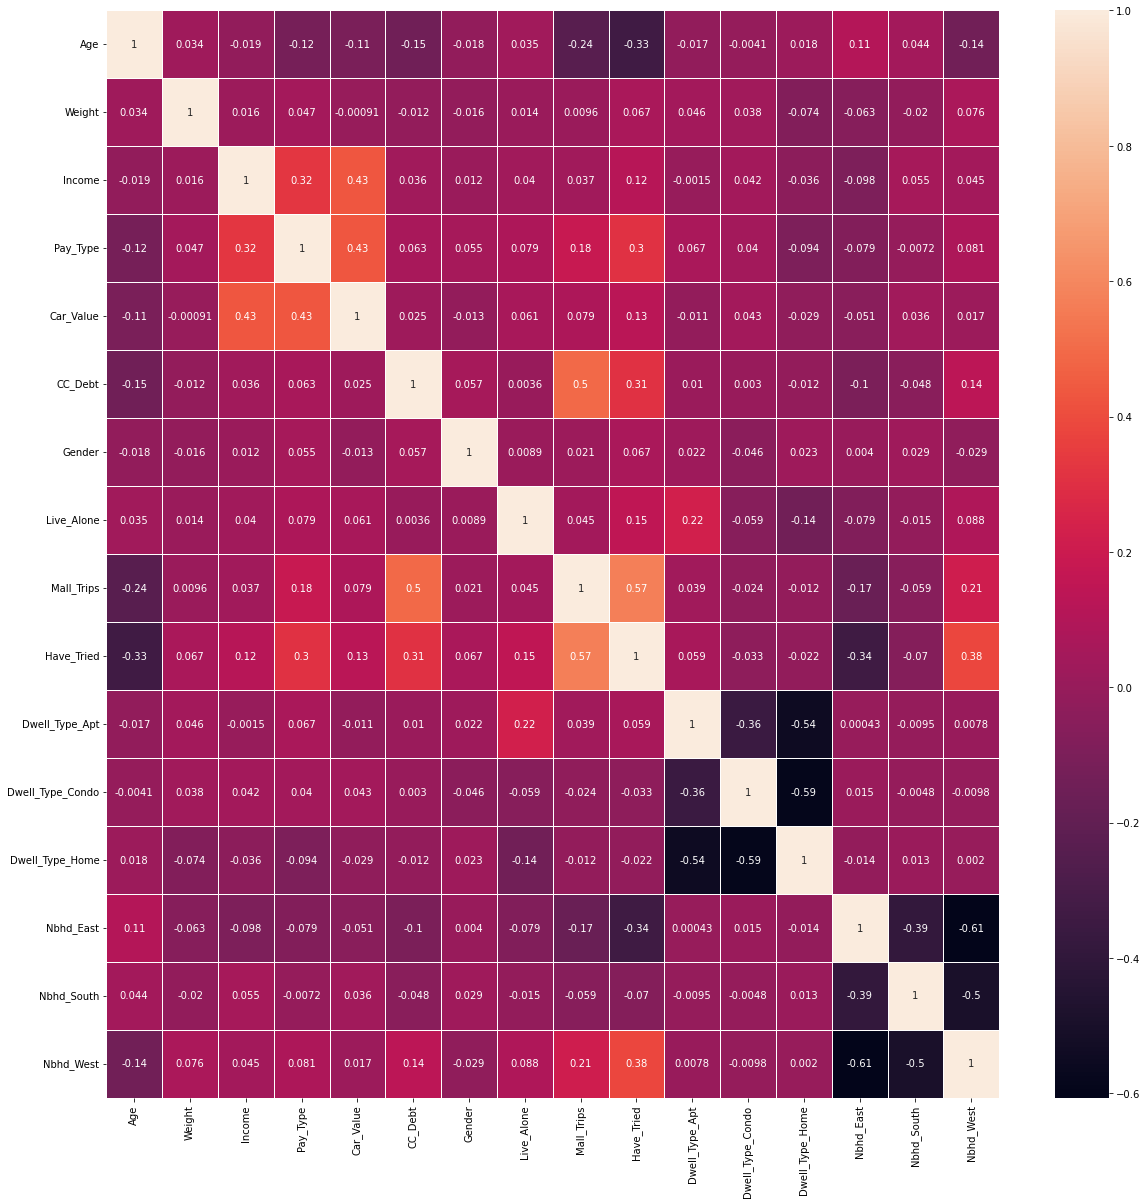

In [13]:
# finding correlation between variables that impact dependent variable Have_tried 

fig, ax = plt.subplots(figsize=(20,20))
corl = new_lasagna_df.corr()
sns.heatmap(corl, annot=True,linewidths=.5, ax=ax);

* correlations with have tried dependent variable is majorly influenced by these independent vaariables. So following EDA will be conducted on these variable with dependent variable have_tried

* Age, Income, Pay_Type, Car_Value, CC_Debt', Live_Alone, Mall_Trips, 'Nbhd_East', 'Nbhd_South','Nbhd_West'

In [14]:
new_lasagna_df.columns

Index(['Age', 'Weight', 'Income', 'Pay_Type', 'Car_Value', 'CC_Debt', 'Gender',
       'Live_Alone', 'Mall_Trips', 'Have_Tried', 'Dwell_Type_Apt',
       'Dwell_Type_Condo', 'Dwell_Type_Home', 'Nbhd_East', 'Nbhd_South',
       'Nbhd_West'],
      dtype='object')

###  Group by

In [15]:
# Salaried-1, male-1, Live_alone- No-0, Have_tried_yes -1

A = new_lasagna_df.groupby('Gender').sum()
B = A.drop(columns = ["Mall_Trips",'Age', 'Weight', 'Income','Car_Value','CC_Debt',], axis =1)
B

,Pay_Type,Live_Alone,Have_Tried,Dwell_Type_Apt,Dwell_Type_Condo,Dwell_Type_Home,Nbhd_East,Nbhd_South,Nbhd_West
Gender,,,,,,,,,
0,212,66,216,95,120,183,128,91,179
1,269,79,279,118,119,221,149,116,193


In [16]:
# Salaried-1, male-1, Live_alone- No-0, Have_tried_yes -1

C = new_lasagna_df.groupby('Gender').sum()
E = A.drop(columns = ["Mall_Trips",'Age', 'Weight', 'Income','Car_Value','CC_Debt',], axis =1)
E

,Pay_Type,Live_Alone,Have_Tried,Dwell_Type_Apt,Dwell_Type_Condo,Dwell_Type_Home,Nbhd_East,Nbhd_South,Nbhd_West
Gender,,,,,,,,,
0,212,66,216,95,120,183,128,91,179
1,269,79,279,118,119,221,149,116,193


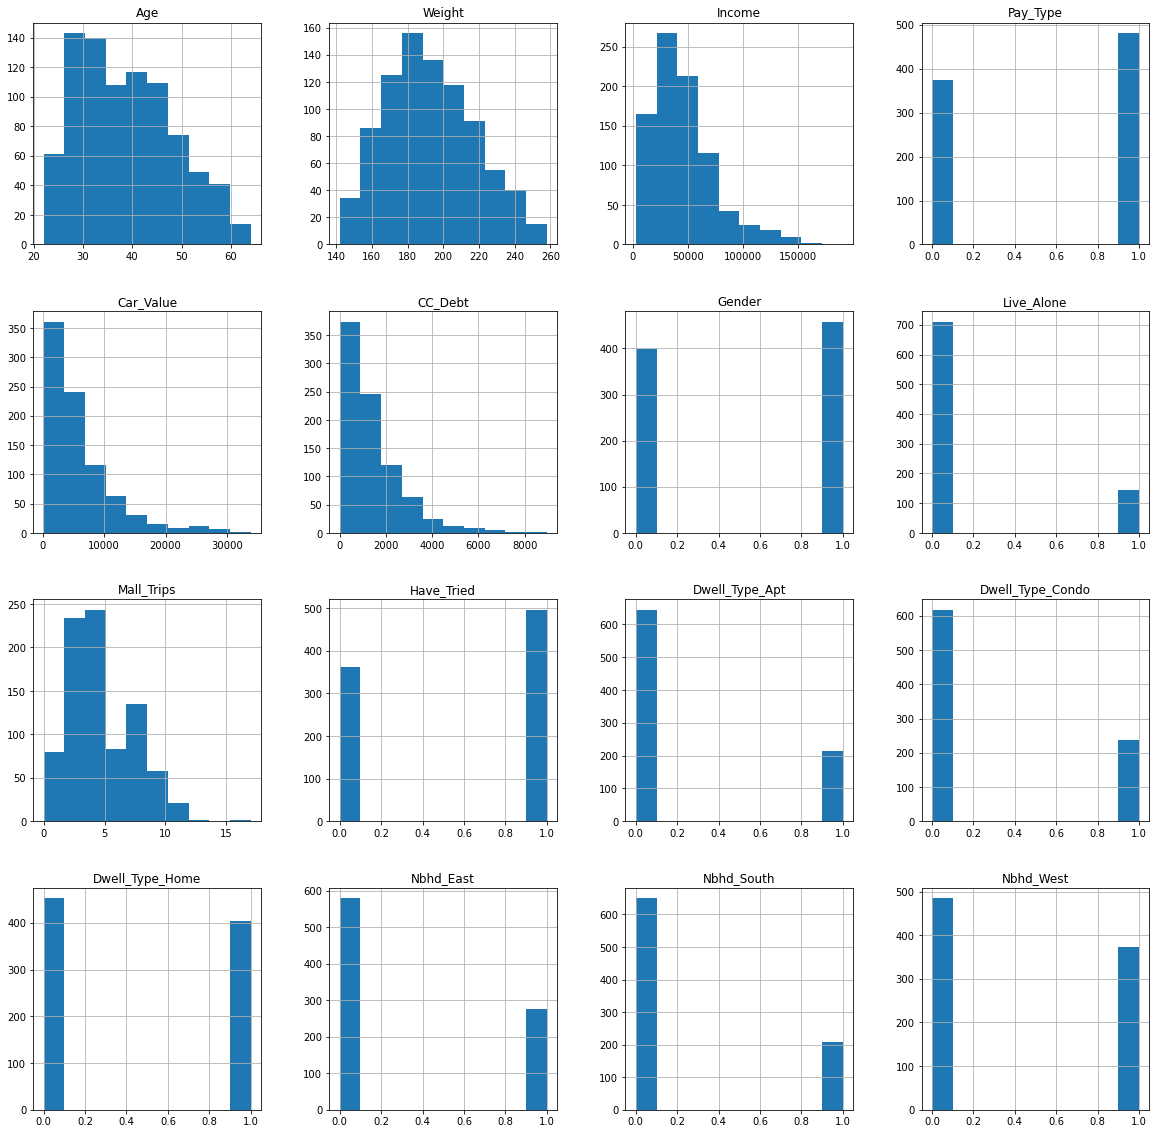

In [17]:
new_lasagna_df.hist(figsize = (20,20));

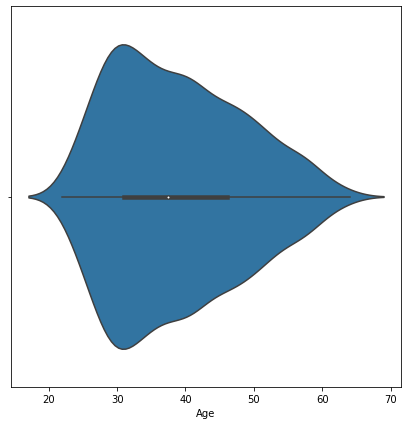

In [18]:

#count	mean	std	min	25%	50%	75%	max
#Age	856.0	38.782710	9.610763	22.0	31.0	37.5	46.0	64.0

plt.figure(figsize=(7, 7))
sns.violinplot(data = new_lasagna_df, x = "Age");

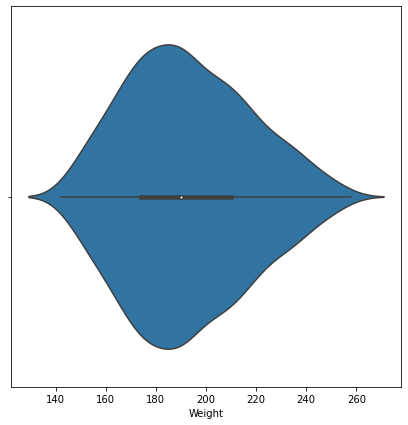

In [19]:
#count	mean	std	min	25%	50%	75%	max
#Weight	856.0	192.661215	24.746380	142.0	174.0	190.0	210.0	258.0

plt.figure(figsize=(7, 7))
sns.violinplot(data = new_lasagna_df, x = "Weight");

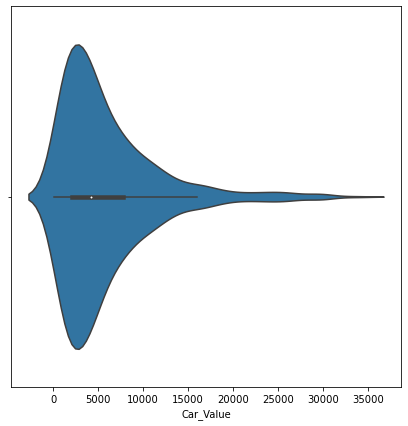

In [20]:
#	count	mean	std	min	25%	50%	75%	max
# Car_Value	856.0	5908.481308	5533.459122	130.0	2110.0	4175.0	7717.5	33870.0


plt.figure(figsize=(7, 7))
sns.violinplot(data = new_lasagna_df, x = "Car_Value");

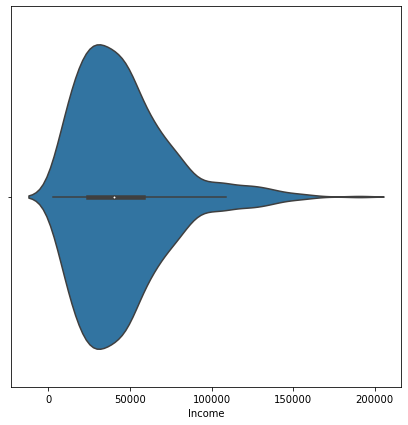

In [21]:
#count	mean	std	min	25%	50%	75%	max
#Income	856.0	45266.939252	28631.290583	2600.0	24475.0	39950.0	58225.0	190500.0

plt.figure(figsize=(7, 7))
sns.violinplot(data = new_lasagna_df, x = "Income");

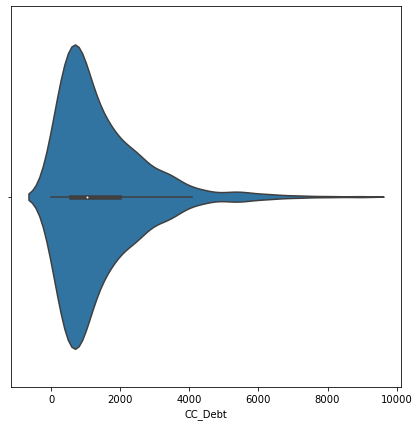

In [22]:

#count	mean	std	min	25%	50%	75%	max
#CC_Debt	856.0	1431.203271	1278.041567	0.0	560.0	1020.0	1972.5	8960.0

plt.figure(figsize=(7, 7))
sns.violinplot(data = new_lasagna_df, x = "CC_Debt");

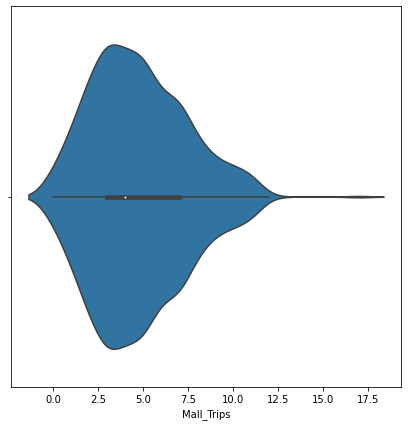

In [23]:
#count	mean	std	min	25%	50%	75%	max
#Mall_Trips	856.0	4.734813	2.640840	0.0	3.0	4.0	7.0	17.0

plt.figure(figsize=(7, 7))
sns.violinplot(data = new_lasagna_df, x = "Mall_Trips");

C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


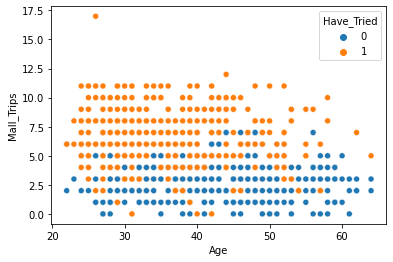

In [24]:
# scatter plot using seaborn - # Age, Income, Pay_Type, Car_Value, CC_Debt', Live_Alone, Mall_Trips, 'Nbhd_East', 'Nbhd_South','Nbhd_West'


sns.scatterplot('Age', 'Mall_Trips', hue='Have_Tried',data=new_lasagna_df);

In [25]:
#plt.figure(figsize=(40, 40))
#sns.violinplot(data = new_lasagna_df, x = "Age", y="Mall_Trips", hue="Have_Tried");


# Too skewed data for voilin plotf

In [26]:
new_lasagna_df.columns

Index(['Age', 'Weight', 'Income', 'Pay_Type', 'Car_Value', 'CC_Debt', 'Gender',
       'Live_Alone', 'Mall_Trips', 'Have_Tried', 'Dwell_Type_Apt',
       'Dwell_Type_Condo', 'Dwell_Type_Home', 'Nbhd_East', 'Nbhd_South',
       'Nbhd_West'],
      dtype='object')

C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


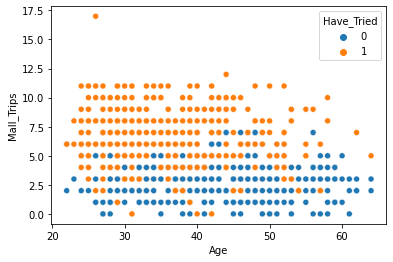

In [27]:
# scatter plot using seaborn - # Age, Income, Pay_Type, Car_Value, CC_Debt', Live_Alone, Mall_Trips, 'Nbhd_East', 'Nbhd_South','Nbhd_West'


sns.scatterplot('Age', 'Mall_Trips', hue='Have_Tried',data=new_lasagna_df);

C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


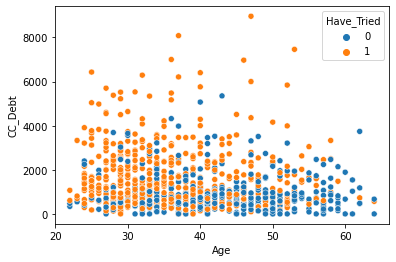

In [28]:
# Age, Income, Pay_Type, Car_Value, CC_Debt', Live_Alone, Mall_Trips, 'Nbhd_East', 'Nbhd_South','Nbhd_West'

sns.scatterplot('Age', 'CC_Debt', hue='Have_Tried',data=new_lasagna_df);

C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


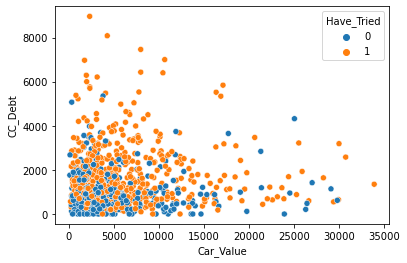

In [29]:
# Age, Income, Pay_Type, Car_Value, CC_Debt', Live_Alone, Mall_Trips, 'Nbhd_East', 'Nbhd_South','Nbhd_West'

sns.scatterplot('Car_Value', 'CC_Debt', hue='Have_Tried',data=new_lasagna_df);

C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


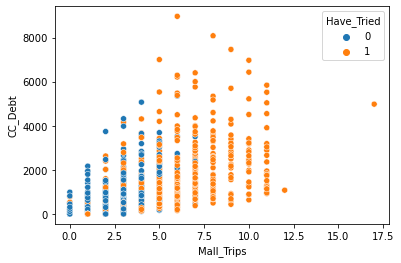

In [30]:
# Age, Income, Pay_Type, Car_Value, CC_Debt', Live_Alone, Mall_Trips, 'Nbhd_East', 'Nbhd_South','Nbhd_West'

sns.scatterplot('Mall_Trips', 'CC_Debt', hue='Have_Tried',data=new_lasagna_df);

* More trips a customer they are likely to have tried the lasagna and vice versa
* More trips a customer their CC_Debt to be higher and vice versa

C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


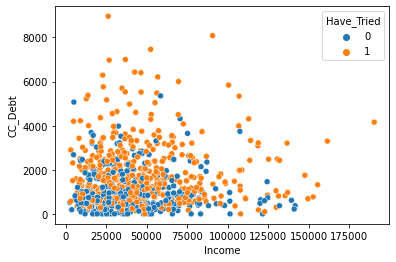

In [31]:
# Age, Income, Pay_Type, Car_Value, CC_Debt', Live_Alone, Mall_Trips, 'Nbhd_East', 'Nbhd_South','Nbhd_West'

sns.scatterplot( 'Income','CC_Debt', hue='Have_Tried',data=new_lasagna_df);

* Individuals with higher income have higher portion of debt compared to lower income
* higher portion of individuals above 35000 income and 1500 CC_debt have tried the frozen 

## 5. CrossTabs

In [32]:
new_lasagna_df.columns

Index(['Age', 'Weight', 'Income', 'Pay_Type', 'Car_Value', 'CC_Debt', 'Gender',
       'Live_Alone', 'Mall_Trips', 'Have_Tried', 'Dwell_Type_Apt',
       'Dwell_Type_Condo', 'Dwell_Type_Home', 'Nbhd_East', 'Nbhd_South',
       'Nbhd_West'],
      dtype='object')

In [33]:
pd.crosstab(new_lasagna_df.Pay_Type,new_lasagna_df.Have_Tried,margins=True)

Have_Tried,0,1,All
Pay_Type,,,
0,222,153,375
1,139,342,481
All,361,495,856


In [34]:
pd.crosstab(new_lasagna_df.Gender,new_lasagna_df.Have_Tried,margins=True)

Have_Tried,0,1,All
Gender,,,
0,182,216,398
1,179,279,458
All,361,495,856


In [35]:
pd.crosstab(new_lasagna_df.Live_Alone,new_lasagna_df.Have_Tried,margins=True)

Have_Tried,0,1,All
Live_Alone,,,
0,324,387,711
1,37,108,145
All,361,495,856


In [36]:
pd.crosstab([new_lasagna_df.Pay_Type,new_lasagna_df.Mall_Trips],[new_lasagna_df.Have_Tried],margins=True)

Have_Tried             0    1  All
Pay_Type Mall_Trips               
0        0            12    1   13
         1            27    1   28
         2            40   10   50
         3            62   15   77
         4            36   14   50
         5            29   33   62
         6             6   23   29
         7            10   20   30
         8             0   15   15
         9             0   12   12
         10            0    7    7
         11            0    2    2
1        0             7    3   10
         1            24    5   29
         2            36   14   50
         3            25   32   57
         4            28   43   71
         5            12   48   60
         6             5   49   54
         7             2   54   56
         8             0   34   34
         9             0   20   20
         10            0   19   19
         11            0   19   19
         12            0    1    1
         17            0    1    1
All                  361  495  856

22
64


array([22., 36., 50., 64.])

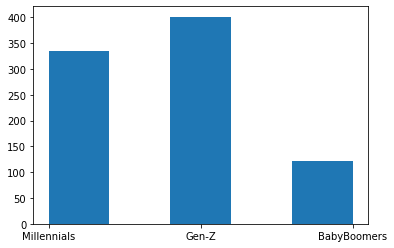

In [37]:
bin_lasagna_df = new_lasagna_df

min_value = bin_lasagna_df['Age'].min()
max_value = bin_lasagna_df['Age'].max()
print(min_value)
print(max_value)
import numpy as np
bins = np.linspace(min_value,max_value,4)
bins
labels = ['Gen-Z', 'Millennials','BabyBoomers']

bin_lasagna_df['bins'] = pd.cut(bin_lasagna_df['Age'], bins=bins, labels=labels, include_lowest=True)
plt.hist(bin_lasagna_df['bins'], bins=5);
bins

## 6. LinerRegression 

In [38]:
final_lasagnadf = new_lasagna_df.drop('bins', axis=1)

In [39]:
final_lasagnadf.head()

,Age,Weight,Income,Pay_Type,Car_Value,CC_Debt,Gender,Live_Alone,Mall_Trips,Have_Tried,Dwell_Type_Apt,Dwell_Type_Condo,Dwell_Type_Home,Nbhd_East,Nbhd_South,Nbhd_West
Person,,,,,,,,,,,,,,,,
1,48,175,65500,0,2190,3510,1,0,7,0,0,0,1,1,0,0
2,33,202,29100,0,2110,740,0,0,4,1,0,1,0,1,0,0
3,51,188,32200,1,5140,910,1,0,1,0,0,1,0,1,0,0
4,56,244,19000,0,700,1620,0,0,3,0,0,0,1,0,0,1
5,28,218,81400,1,26620,600,1,0,3,1,1,0,0,0,0,1


In [40]:
# import algorithm --- LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc



#setup random seed

np.random.seed(42)

#create the data train and validation/test

x = final_lasagnadf.drop("Have_Tried", axis =1)

y = final_lasagnadf["Have_Tried"] # median house price in $100000s

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate and fit the mode ( on the training set)

model1 = LinearRegression()
model1.fit(x_train, y_train)

# Check the score of the model (on the test set)
print("Model Score",model1.score(x_train, y_train))
print("Model Score",model1.score(x_test, y_test))
print('intercept ', model1.intercept_)
print(pd.DataFrame({'coeff': model1.coef_}, index=x.columns).transpose())

Model Score 0.48733920113688634
Model Score 0.46248274579234205
intercept  0.2740733496684688
            Age    Weight        Income  Pay_Type  Car_Value   CC_Debt  \
coeff -0.008534  0.000451  4.005411e-07  0.186305  -0.000003  0.000011   

         Gender  Live_Alone  Mall_Trips  Dwell_Type_Apt  Dwell_Type_Condo  \
coeff  0.041141    0.143203    0.075666        0.005324          -0.02164   

       Dwell_Type_Home  Nbhd_East  Nbhd_South  Nbhd_West  
coeff         0.016316  -0.164481   -0.000479    0.16496  


In [41]:
cross_val_score(model1, x, y, cv=5) # gives 5 different socres

array([0.49361741, 0.42520992, 0.45042203, 0.43935942, 0.5209807 ])


* R^2 (pronounced r-squared) or coefficient of determination : statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Mean absolute error (MAE) : mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon
* Mean squared error (MSE) :  mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_preds = model1.predict(x_test)
print("Regression metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R^2: 0.46248274579234205
MAE: 0.3009974391468215
MSE: 0.13348902334585125


## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#setup random seed

np.random.seed(42)

#create the data train and validation/test

a = final_lasagnadf.drop("Have_Tried", axis =1)

b = final_lasagnadf["Have_Tried"]

# split into train and test sets

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)


# Instantiate and fit the mode ( on the training set)

model2 = LogisticRegression(solver='liblinear')
model2.fit(a_train, b_train)

# Check the score of the model (on the test set)
print("Model Score",model2.score(a_train, b_train))
print("Model Score",model2.score(a_test, b_test))
print('intercept ', model2.intercept_[0])
print(pd.DataFrame({'coeff': model2.coef_[0]}, index=a.columns).transpose())


Model Score 0.7997076023391813
Model Score 0.8313953488372093
intercept  -0.003941428497679261
            Age   Weight    Income  Pay_Type  Car_Value   CC_Debt    Gender  \
coeff -0.062807 -0.00085  0.000007  0.126721   0.000019  0.000042  0.024355   

       Live_Alone  Mall_Trips  Dwell_Type_Apt  Dwell_Type_Condo  \
coeff    0.069908    0.556608        0.019616         -0.024404   

       Dwell_Type_Home  Nbhd_East  Nbhd_South  Nbhd_West  
coeff         0.000846  -0.174217   -0.011619   0.181894  


In [44]:
cross_val_score(model2, a, b, cv=5) # gives 5 different socres

array([0.81395349, 0.80116959, 0.77777778, 0.78362573, 0.89473684])

In [45]:
#code for using logistic regression to generate predicted probabilities
logit_reg_pred = model2.predict(a_test)
logit_reg_proba = model2.predict_proba(a_test)
logit_result = pd.DataFrame({'actual': b_test, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
    
# display four different cases
#interestingCases = [2764, 932, 2721, 702]
print(logit_result)

        actual      p(0)      p(1)  predicted
Person                                       
712          1  0.135493  0.864507          1
604          1  0.815772  0.184228          0
121          0  0.570365  0.429635          0
209          1  0.022977  0.977023          1
381          0  0.711503  0.288497          0
...        ...       ...       ...        ...
550          1  0.447779  0.552221          1
236          1  0.101103  0.898897          1
334          0  0.628618  0.371382          0
216          0  0.429287  0.570713          1
791          0  0.806248  0.193752          0

[172 rows x 4 columns]


### A confusion matrix is a quick way to compare the lables a model predicts and the acutal lables it was supposed to predict. In essence giving you an idea of where the model is getting confused.

In [46]:
#confusion matrics for train

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logit_reg_pred = model2.predict(a_train)
accuracy = accuracy_score(b_train,logit_reg_pred)
print(accuracy)
confusion_matrix(b_train,logit_reg_pred)

0.7997076023391813


array([[206,  76],
       [ 61, 341]], dtype=int64)

In [47]:
#confusion matrics for test

from sklearn.metrics import accuracy_score

logit_reg_pred = model2.predict(a_test)
accuracy = accuracy_score(b_test,logit_reg_pred)
print(accuracy)
confusion_matrix(b_test,logit_reg_pred)

0.8313953488372093


array([[65, 14],
       [15, 78]], dtype=int64)

## Classification Trees

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create X & Y

X = final_lasagnadf.drop("Have_Tried", axis =1)
Y = final_lasagnadf["Have_Tried"]


# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
# Create the model


clf = RandomForestClassifier()

# Fit the model

model3 = clf.fit(X_train,Y_train)

#make predictions

Y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions


print("Classifier metrics on the set")
print(f"Accurracy:", model3.score(X_train,Y_train))
print(f"Accurracy:", model3.score(X_test,Y_test))
print(f"Precision: {precision_score(Y_test, Y_preds)}")
print(f"Recall: {recall_score(Y_test, Y_preds)}")
print(f"F1: {f1_score(Y_test, Y_preds)}")

Classifier metrics on the set
Accurracy: 1.0
Accurracy: 0.8255813953488372
Precision: 0.8461538461538461
Recall: 0.8279569892473119
F1: 0.8369565217391305


* Precision : indicates the porportion of positive identifications (model predicted class 1) which were actual correct. A model which produces no false positive has a precision of 1.0
* Recall : Indicates the proportion of actival positives which were correctly classiciated. A model which produces no false negatives has a recall of 1.0
* F1 score : A combination of precision and recall. A perfect model achieves an F1 score of 1.0
* Support : The number of samples each matric was calculated on
* Accuracy : The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0
* Macro avg : Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into effort, so if you do have class imbalances, pay attention to this metric. 
* Weighted avg : Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high values when one class out performs another due to having more samples).

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        79
           1       0.85      0.83      0.84        93

    accuracy                           0.83       172
   macro avg       0.82      0.83      0.82       172
weighted avg       0.83      0.83      0.83       172



## Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
import pydotplus
import graphviz

In [51]:
# split the train and validation data
c = final_lasagnadf.drop("Have_Tried", axis =1)
d = final_lasagnadf["Have_Tried"]
train_c, val_c, train_d, val_d = train_test_split(c, d, test_size = .2, random_state = 1)

* Decision tree analysis involves visually outlining the potential outcomes of a complex decision. These trees are particularly helpful for analyzing quantitative data and making a decision based on numbers.

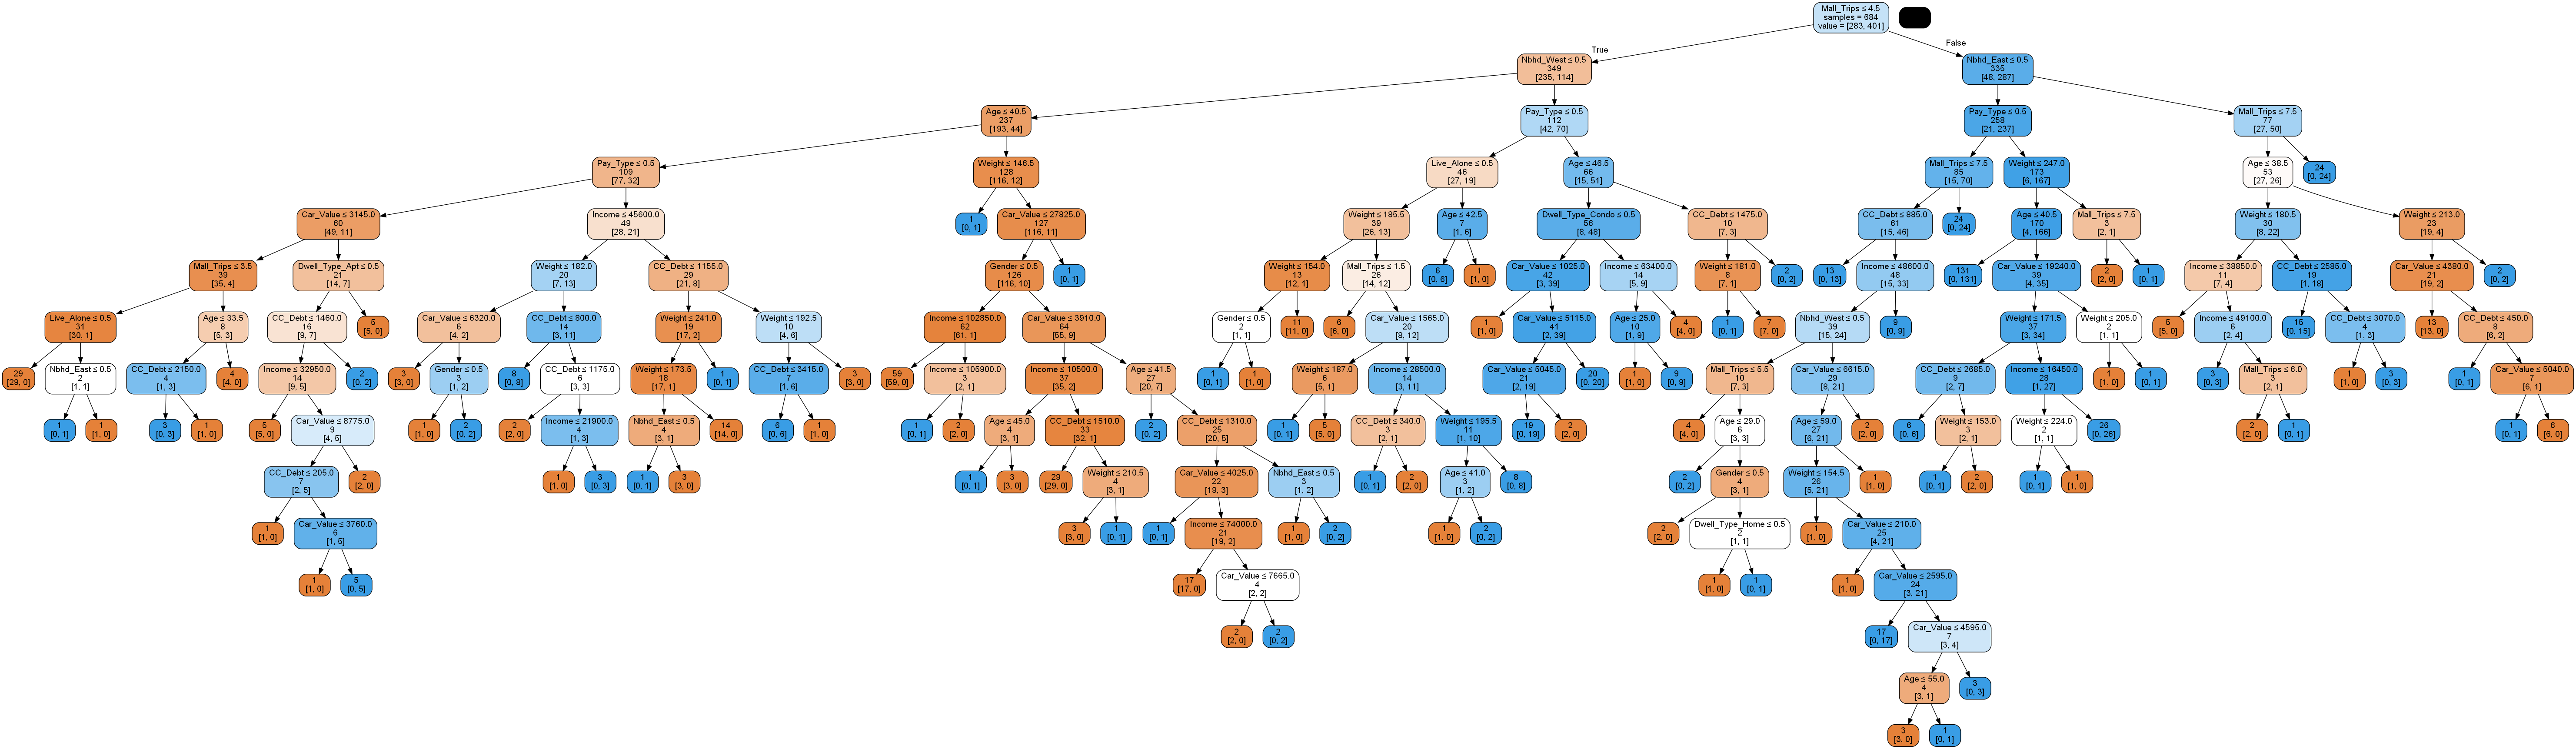

In [52]:
import pydotplus

fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_c, train_d)

plotDecisionTree(fullClassTree, feature_names=train_c.columns)

In [53]:
classificationSummary(train_d, fullClassTree.predict(train_c))
classificationSummary(val_d, fullClassTree.predict(val_c))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 283   0
     1   0 401
Confusion Matrix (Accuracy 0.7035)

       Prediction
Actual  0  1
     0 50 28
     1 23 71


In [54]:
treeClassifier = DecisionTreeClassifier(random_state=1)

scores = cross_val_score(treeClassifier, train_c, train_d, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

Accuracy scores of each fold:  ['0.796', '0.723', '0.701', '0.715', '0.721']


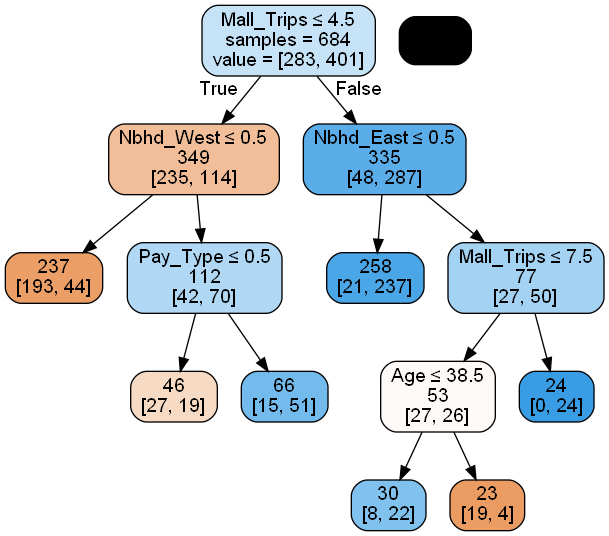

In [55]:
smallClassTree = DecisionTreeClassifier(max_depth=50, min_samples_split=20,
                        min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_c, train_d)

plotDecisionTree(smallClassTree, feature_names=train_c.columns)

# Explanation on above decision tree 

Data considered for the decision tree is "train_c," with a count of 684 data values. Based on the impurity level depth we have selected, the splitting occurs. 

Root Node, Mall_trips, is the most significant decision rule and highly correlates to the dependent variable; hence, the algorithm picked mall trips. The values shown in the root node are the average/mean number of trips taken by 684 individuals from the dataset. Samples provide information on the count of samples considered. 
Value provides the decision outcome of the data considered and the information on how the data is divided as per the decision. In this case, values of 283 are predicted count of lasagna tried vs actual 295, 401 not tested lasagna data points vs true of 389. 

Based on the root nodes condition of mall_trips <_ 4.5, the algorithm divides the dataset into True and False splits. Under the two split child nodes, the decision variable of neigbhourhood Nbhd_west and Nbhd_east is applied. The dependent variable is predicted, i.e. out of 349 data points, 235 have tried, and 114 have not tried based on the decision variable of mall trip and the neighbourhood. 

Further split of the Child node with condition Nbhd_West <_0.5. Under the child node, we have 349 data values which are now divided into two, with one side being a leaf node (237) and another a child node(112). A leaf node is a node which does not split further as it has 0 impurities and has no errors. When you look at the other side node, i.e. with data points of 112 child nodes, the model applies a decision variable of Pay_Type to predict and split further. 

The above activity continues to repeat until it finds the lowest impurity in its decision node and is based on the depth of the tree we define.
